Using the cleaned up version of RayTrace, an attempt to model the four center ellipses of the FTS. 

Mira

In [6]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunClean import *
from random import uniform

In [7]:
origin1 = [0,-128] #x,y (ellipse1)
origin2 = [64.15,-128] #x,y (ellipse2)
origin3 = [0,128] #x,y (ellipse3)
origin4 = [64.15,128] #x,y  (ellipse4)
coeffellipse = [263.9,256,64.15] 
X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
X3,Y3,Z3,X4,Y4,Z4 = FTSEC(50,np.pi/8, coeffellipse, 64.15, origin2, 'pos')
X52,Y52,Z52,X62,Y62,Z62 = FTSEC(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')
X72,Y72,Z72,X82,Y82,Z82 = FTSEC(50,np.pi/8, coeffellipse, 64.15, origin4, 'neg')
Xset1, Yset1, Zset1 = SR2(32.07, X1,Y1,Z1, origin1)
Xset2, Yset2, Zset2 = SR2(32.07, X2, Y2, Z2, origin1)
Xset3, Yset3, Zset3 = SR2(32.07, X3,Y3,Z3, origin2)
Xset4, Yset4, Zset4 = SR2(32.07, X4, Y4, Z4, origin2)
Xset5, Yset5, Zset5 = SR2(32.07, X52,Y52,Z52, origin3)
Xset6, Yset6, Zset6 = SR2(32.07, X62, Y62, Z62, origin3)
Xset7, Yset7, Zset7 = SR2(32.07, X72,Y72,Z72, origin4)
Xset8, Yset8, Zset8 = SR2(32.07, X82, Y82, Z82, origin4)

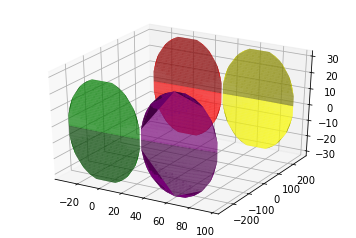

In [3]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset1,Yset1,Zset1, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'red')
pl3dsurf.plot_trisurf(Xset3,Yset3,Zset3, linewidth = .2, antialiased=True, color = 'yellow', label = "Ellipse2")
pl3dsurf.plot_trisurf(Xset4,Yset4,Zset4, linewidth = .2, antialiased=True, color = 'yellow')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'green', label = "Ellipse3")
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'green')
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'purple', label = "Ellipse4")
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'purple')
#pl3dsurf.set_ylim([-300,300])
pl.show()

In [8]:
#original source and ellipse
pli1 = [0,250,0]
theta1 = np.pi/2
specnum1 = 3000
xrange1 = 32
coeffellipse = [263.9,256,64.15]

#original
xi,yi,zi,xr,yr,zr, pointints1, vect1 = RSOEP(coeffellipse,pli1, theta1, specnum1, xrange1,pli1, 'pos')

#SO NOW USING THE REFLECTED RAYS HERE AS the incident rays on the ellipse across from it with origin 3
vect1 = negvect(vect1)
xi2,yi2,zi2,xr2,yr2,zr2, pointints2, vect2 = RSEPC(coeffellipse,pointints1,vect1, xrange1,origin3, 'neg')

#NOW USING THE REFLECTED RAYS HERE AS the incident rays on the ellipse with origin 4
xi3,yi3,zi3,xr3,yr3,zr3, pointints3, vect3 = RSEPC(coeffellipse,pointints1,vect1, xrange1,origin4, 'neg')

#NOW USING THE REFLECTED RAYS FROM ellipse 3 and 4 on the ellipse with origin 2
vect2 = negvect(vect2)
vect3 = negvect(vect3)
xi4,yi4,zi4,xr4,yr4,zr4, pointints4, vect4 = RSEPC(coeffellipse,pointints2,vect2, xrange1,origin2, 'pos')
xi5,yi5,zi5,xr5,yr5,zr5, pointints5, vect5 = RSEPC(coeffellipse,pointints3,vect3, xrange1,origin2, 'pos')



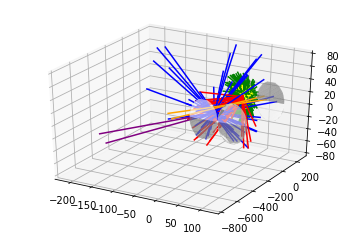

In [9]:
pl3dsurf = pl.figure().gca(projection = '3d')

# ELLIPSE 1
pl3dsurf.plot_trisurf(Xset1,Yset1,Zset1, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'white')
for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
    
# ELLIPSE 3
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'white')
for n in range (0,len(xi2)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi2[n],yi2[n],zi2[n], color = 'red') #intial
    pl3dsurf.plot(xr2[n],yr2[n],zr2[n], color = 'blue') #reflected
    
# ELLIPSE 4
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'white')
for n in range (0,len(xi3)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi3[n],yi3[n],zi3[n], color = 'red') #intial
    pl3dsurf.plot(xr3[n],yr3[n],zr3[n], color = 'blue') #reflected
    
# ELLIPSE 2
pl3dsurf.plot_trisurf(Xset3,Yset3,Zset3, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset4,Yset4,Zset4, linewidth = .2, antialiased=True, color = 'white')
for n in range (0,len(xi4)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi4[n],yi4[n],zi4[n], color = 'purple') #intial
    pl3dsurf.plot(xr4[n],yr4[n],zr4[n], color = 'orange') #reflected
for n in range (0,len(xi5)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi5[n],yi5[n],zi5[n], color = 'purple') #intial
    pl3dsurf.plot(xr5[n],yr5[n],zr5[n], color = 'orange') #reflected
pl.show()

#intersections DONT SEEM TO BE CORRECT

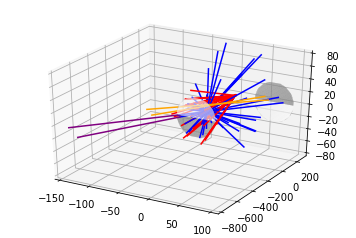

In [11]:
pl3dsurf = pl.figure().gca(projection = '3d')

# ELLIPSE 1
#pl3dsurf.plot_trisurf(Xset1,Yset1,Zset1, linewidth = .2, antialiased=True, color = 'white')
#pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'white')
#for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    #pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    #pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
    
# ELLIPSE 3
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'white')
for n in range (0,len(xi2)):
    #pl3dsurf.scatter(pointints2[n][0], pointints2[n][1], pointints2[n][2], color = 'black')
    pl3dsurf.plot(xi2[n],yi2[n],zi2[n], color = 'red') #intial
    pl3dsurf.plot(xr2[n],yr2[n],zr2[n], color = 'blue') #reflected
    
# ELLIPSE 4
#pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'white')
#pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'white')
#for n in range (0,len(xi3)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    #pl3dsurf.plot(xi3[n],yi3[n],zi3[n], color = 'red') #intial
    #pl3dsurf.plot(xr3[n],yr3[n],zr3[n], color = 'blue') #reflected
    
# ELLIPSE 2
pl3dsurf.plot_trisurf(Xset3,Yset3,Zset3, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset4,Yset4,Zset4, linewidth = .2, antialiased=True, color = 'white')
for n in range (0,len(xi4)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi4[n],yi4[n],zi4[n], color = 'purple') #intial
    pl3dsurf.plot(xr4[n],yr4[n],zr4[n], color = 'orange') #reflected
for n in range (0,len(xi5)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi5[n],yi5[n],zi5[n], color = 'purple') #intial
    pl3dsurf.plot(xr5[n],yr5[n],zr5[n], color = 'orange') #reflected
pl.show()